# Imports

In [1]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint
import os
import time
import prepare
import json

import pandas as pd
import numpy as np
import unicodedata
#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#play with words
import nltk
import re
from pprint import pprint

#split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

import wrangle

from sklearn.model_selection import train_test_split

# Project goals
* Acquire repositories and clean, tokenize, stem, lemmatize, and apply stopwords to the README content.

* Explore the words and statistics of the README files to build visuals for insights into modeling.

* Produce a viable model to predict programming languages based on content of README file.

* Other key drivers:
    * type of 'language'
    * content of 'readme_contents'

## Project Description

* Gathering repositories from GitHub on healthcare, we are creating a model to predict the programming language based on the content of the README file. 

## Initial Thoughts

* There appears to be key words within the content that will predict the programming language and drive a better predictor than baseline.

# Aqcuire
> * Data acquired from the github website
> * Each row represents a github readme

# Prepare
> * Verified datatypes
> * Checked for nulls
> * Split the data, stratafying on Language
> * Dropped duplicates
> * Created a new column that found the length of lemmatized column
> * Clean, Stemmed, and Lemmatized data

# Explore
* Explore dataset for predictors of programming language
    * Answer the following questions:
        * Do different programming languages (PL) use a different number of unique
        * What bigram words occur the most in each programming language
        * Do different programming languages use a different number of unique words?
        * What trigram words occur the most in each programming language

In [2]:
new_df = wrangle.get_dataframe()

In [3]:
new_df

,repo,language,readme_contents,clean,stemmed,lemmatized,lem_len
0,Project-MONAI/MONAI,Python,"<p align=""center""> <img width=""50%"" alt='proje...",p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,1542
1,microsoft/HealthBotContainerSample,JavaScript,# Health Bot Container A simple web page that ...,health bot container simple web page allows us...,health bot container simple web page allows us...,health bot container simple web page allows us...,1647
2,TheAlphamerc/flutter_healthcare_app,other,## flutter_healthcare_app ![Twitter [![GitHub ...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,1187
3,nextgenhealthcare/connect,Java,# Mirth® Connect by NextGen Healthcare 1. [Use...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,6110
4,HealthCatalyst/healthcareai-r,other,--- output: github_document --- <!-- README.md...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,2142
...,...,...,...,...,...,...,...
623,ColoredCow/telemedicine-for-tehri,other,# 555-asha A Telemedicine Initiative build wit...,555asha telemedicine initiative build governme...,555asha telemedicine initiative build governme...,555asha telemedicine initiative build governme...,109
624,patel-aum/VitalityVault,JavaScript,# VitalityVault VitalitVaults is healthcare ap...,vitalityvault vitalitvaults healthcare app tak...,vitalityvault vitalitvaults healthcare app tak...,vitalityvault vitalitvaults healthcare app tak...,1035
625,codefordayton/floswhistle-pandemic-v2,JavaScript,# Flo's Whistle - Pandemic A safe space for pa...,flos whistle pandemic safe space patient care ...,flos whistle pandemic safe space patient care ...,flos whistle pandemic safe space patient care ...,3234
626,lahdo/flu-monitor,JavaScript,## Flu Monitor This project aim is to visualiz...,flu monitor project aim visualize number tweet...,flu monitor project aim visualize number tweet...,flu monitor project aim visualize number tweet...,412


In [4]:
new_df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,lem_len
0,Project-MONAI/MONAI,Python,"<p align=""center""> <img width=""50%"" alt='proje...",p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,p aligncenter img width50 altprojectmonai p me...,1542
1,microsoft/HealthBotContainerSample,JavaScript,# Health Bot Container A simple web page that ...,health bot container simple web page allows us...,health bot container simple web page allows us...,health bot container simple web page allows us...,1647
2,TheAlphamerc/flutter_healthcare_app,other,## flutter_healthcare_app ![Twitter [![GitHub ...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,flutterhealthcareapp twitter github github dar...,1187
3,nextgenhealthcare/connect,Java,# Mirth® Connect by NextGen Healthcare 1. [Use...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,mirth connect nextgen healthcare 1 useful link...,6110
4,HealthCatalyst/healthcareai-r,other,--- output: github_document --- <!-- README.md...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,output githubdocument readmemd generated readm...,2142


In [5]:
train, validate, test = wrangle.split_data(new_df, 'language')
HTML_words_df, JavaScript_words_df, Java_words_df, Python_words_df, other_words_df, other_words, Python_words, Java_words, JavaScript_words, HTML_words, other_words_freq, Python_words_freq, Java_words_freq, JavaScript_words_freq, HTML_words_freq, word_counts, all_words, all_freq, all_words_df = wrangle.all_words_function(train)

# what bigram words occur the most in each programming language

<Axes: >

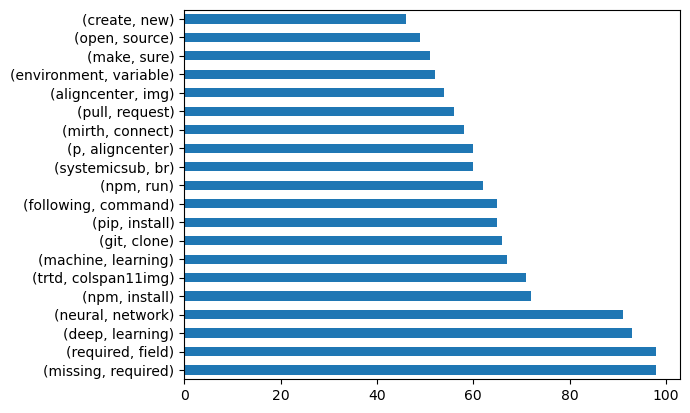

In [6]:
pd.Series(nltk.bigrams(all_words)).value_counts().head(20).plot.barh()

<Axes: >

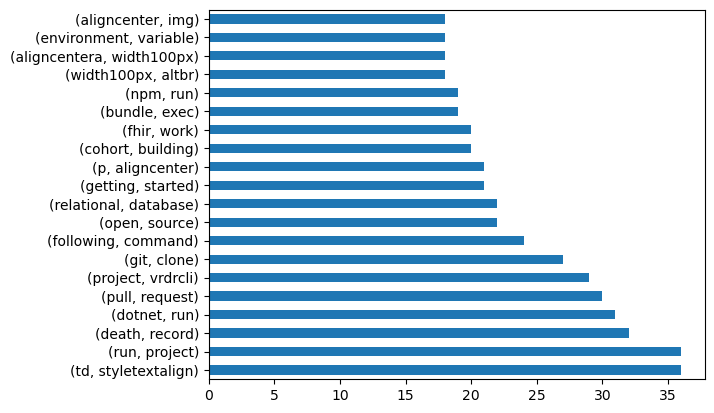

In [7]:
pd.Series(nltk.bigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

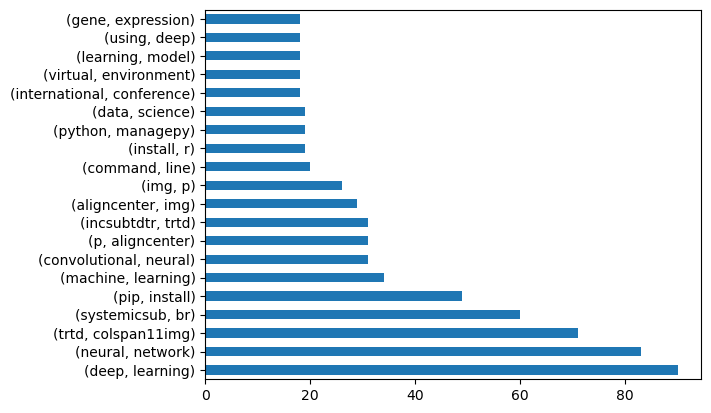

In [8]:
pd.Series(nltk.bigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

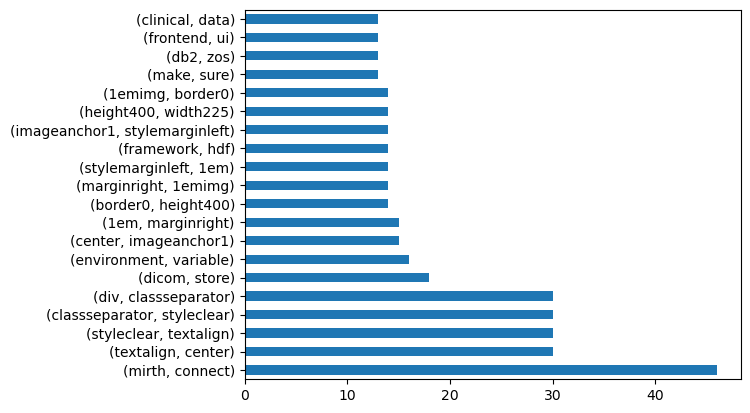

In [9]:
pd.Series(nltk.bigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

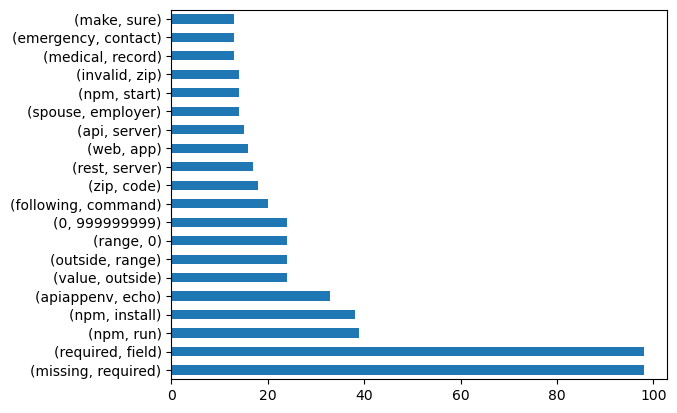

In [10]:
pd.Series(nltk.bigrams(JavaScript_words)).value_counts().head(20).plot.barh()

# Do different programming languages use a different number of unique words?

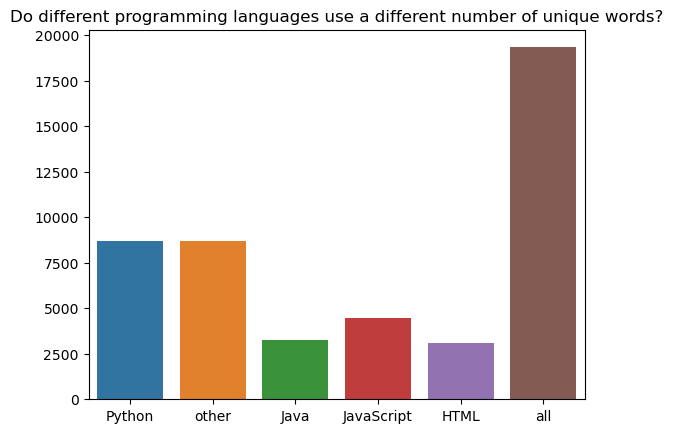

In [11]:
wrangle.visual_one(Python_words_df,other_words_df, Java_words_df, JavaScript_words_df, all_words_df, HTML_words_df)

# what trigram words occur the most in each programming language

<Axes: >

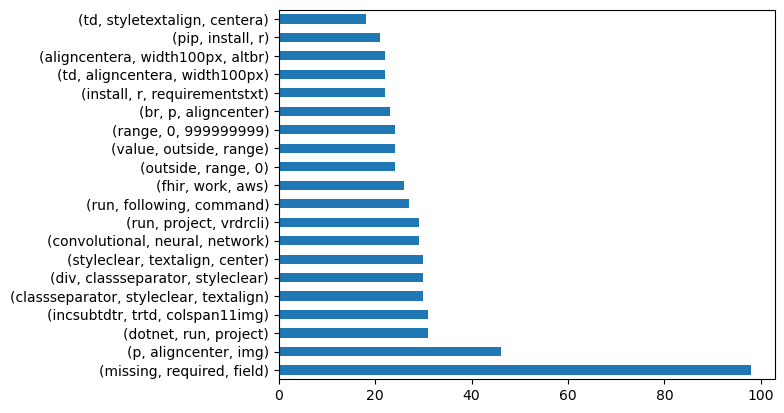

In [12]:
pd.Series(nltk.trigrams(all_words)).value_counts().head(20).plot.barh()

<Axes: >

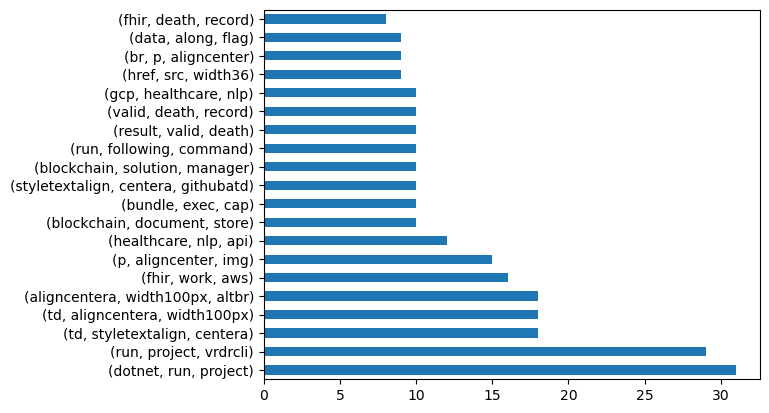

In [13]:
pd.Series(nltk.trigrams(other_words)).value_counts().head(20).plot.barh()

<Axes: >

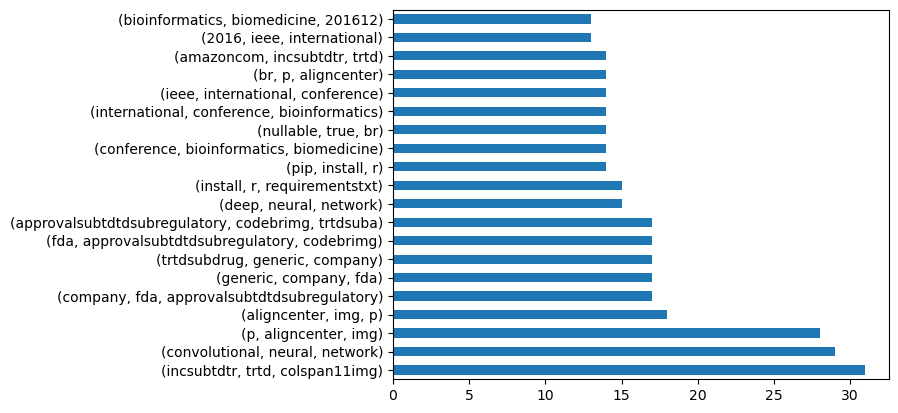

In [14]:
pd.Series(nltk.trigrams(Python_words)).value_counts().head(20).plot.barh()

<Axes: >

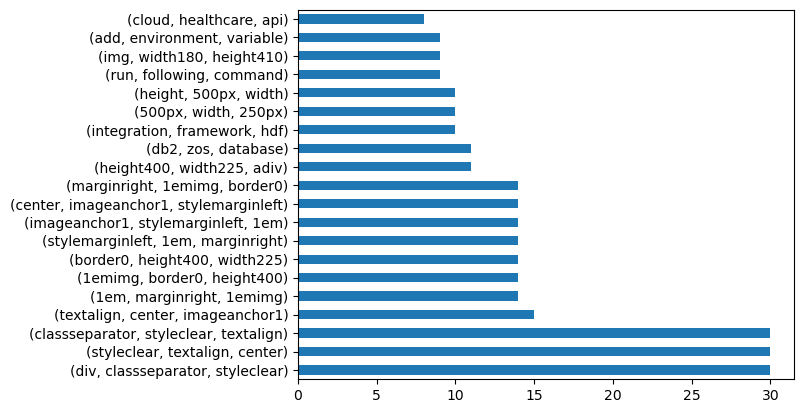

In [15]:
pd.Series(nltk.trigrams(Java_words)).value_counts().head(20).plot.barh()

<Axes: >

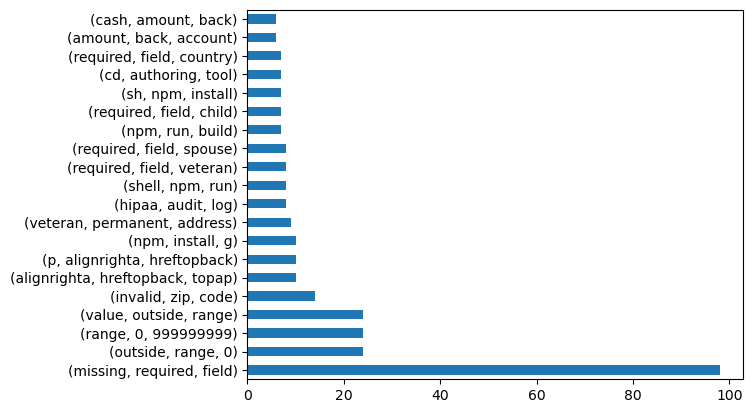

In [16]:
pd.Series(nltk.trigrams(JavaScript_words)).value_counts().head(20).plot.barh()

<Axes: >

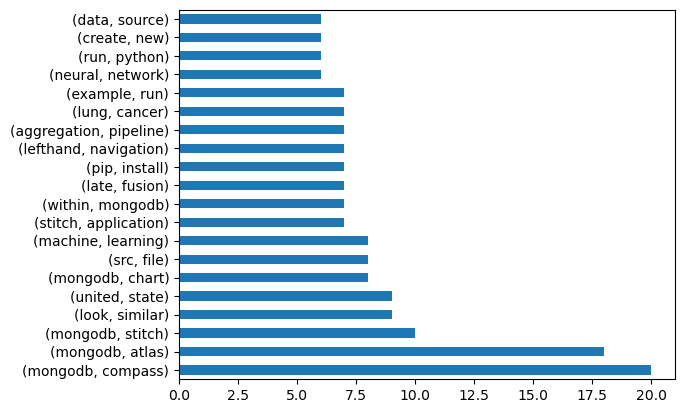

In [17]:
pd.Series(nltk.bigrams(HTML_words)).value_counts().head(20).plot.barh()

# what is the % of each programming language for the most common 20 words

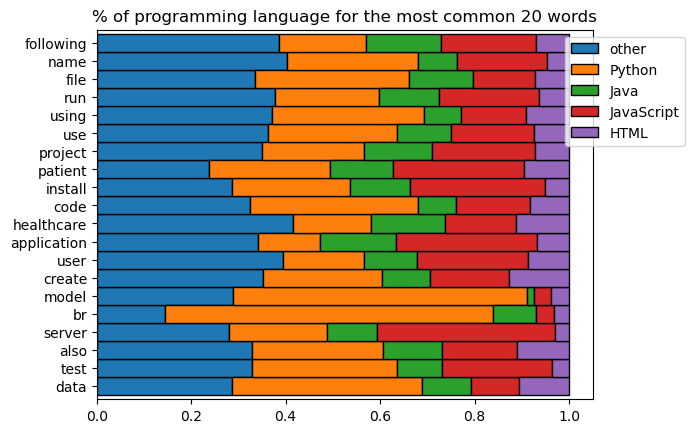

In [18]:
wrangle.visual_two(word_counts)

# Stats test

- we assume a normal distribution because of the amount of samples being over 500
<br>
<b>I will now use a chi-square test to investigate weather "tech_support" and "churn_Yes" are related.</b>
<br>
- I will use a confidence interval of 95%
- the resulting alpha is .05

<b>Ho: There is no difference in means of the length of the word count between programming languages</b>

<b>Ha: There is a difference in means of the length of the word count between programming languages</b>

In [19]:
answer = wrangle.get_stats_test(train)
print('p value', answer[1])

p value 0.03283631881739821


In [20]:
print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


### Exploration Summary
>

# Modeling

In [21]:
the_df, X_test_bow, y_test = wrangle.get_train(new_df)

In [22]:
the_df

,model_train,train_predict,validate_predict
0,baseline,0.381,0.381
1,KNeighborsClassifier,0.455,0.325
2,LogisticRegression,0.997,0.476
3,RandomForestClassifier,0.481,0.413
4,DecisionTreeClassifier,0.638,0.532


In [23]:
X_test_bow

,model_train,train_predict
0,baseline,0.381
4,DecisionTreeClassifier,0.492


## Modeling summary
> * The DecisionTreeClassifier with a max depth of 6 outperformed all of our other models
> * The DecisionTreeClassifier ran on our test data beat baseline by 

# Conclusion
> * Our top model beat the baseline by around 10%.
> * Our clustering and independent variables were able to predict wine quality with greater accuracy.

## Recommendations
> 

## Next Steps
> 